In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid

/Library/Python/3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Python/3.7/site-packages/urllib3/__init__.py:38: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  exceptions.NotOpenSSLWarning,


In [2]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

transform = transforms.Compose([transforms.ToTensor()])

# download the MNIST datasets
path = './datasets'
train_dataset = MNIST(path, transform=transform, download=True)
test_dataset  = MNIST(path, transform=transform, download=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# create train and test dataloaders
batch_size = 128
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

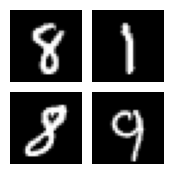

In [4]:
# get 25 sample training images for visualization
image = next(iter(train_loader))

num_samples = 4
width = int(num_samples**0.5)
sample_images = [image[0][i,0] for i in range(num_samples)] 

fig = plt.figure(figsize=(width, width))
grid = ImageGrid(fig, 111, nrows_ncols=(width, width), axes_pad=0.1)

for ax, im in zip(grid, sample_images):
    ax.imshow(im, cmap='gray')
    ax.axis('off')

plt.show()

In [5]:
from gan import train_model

In [6]:
gan_model = train_model(train_loader=train_loader, learning_rate=2e-4, num_epochs=100, g_input_dim=64, d_input_dim=28*28, hidden_dim=256)

Epoch: 1/100, D_loss: 0.8911564350128174, G_loss: 2.47784161567688
Epoch: 2/100, D_loss: 1.1102681159973145, G_loss: 1.408797264099121
Epoch: 3/100, D_loss: 1.0419398546218872, G_loss: 1.142401933670044
Epoch: 4/100, D_loss: 0.7217386960983276, G_loss: 2.187377691268921
Epoch: 5/100, D_loss: 0.761695921421051, G_loss: 2.180870771408081
Epoch: 6/100, D_loss: 0.8476911187171936, G_loss: 2.2122128009796143
Epoch: 7/100, D_loss: 0.8305225968360901, G_loss: 2.1334166526794434
Epoch: 8/100, D_loss: 0.8273367881774902, G_loss: 2.0077908039093018
Epoch: 9/100, D_loss: 0.7635827660560608, G_loss: 2.2280707359313965
Epoch: 10/100, D_loss: 0.7973006963729858, G_loss: 2.258727550506592
Epoch: 11/100, D_loss: 0.683217465877533, G_loss: 2.4471487998962402
Epoch: 12/100, D_loss: 0.671745240688324, G_loss: 2.631253957748413
Epoch: 13/100, D_loss: 0.6995482444763184, G_loss: 2.4944186210632324
Epoch: 14/100, D_loss: 0.649806797504425, G_loss: 2.5110344886779785
Epoch: 15/100, D_loss: 0.5936633348464966

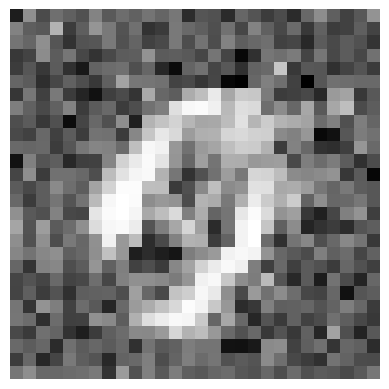

None


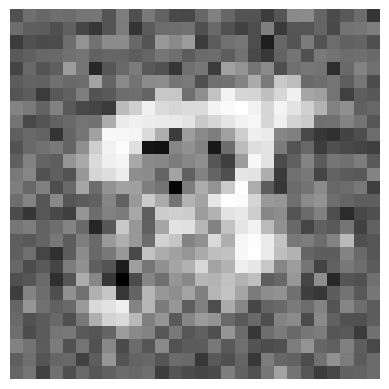

None


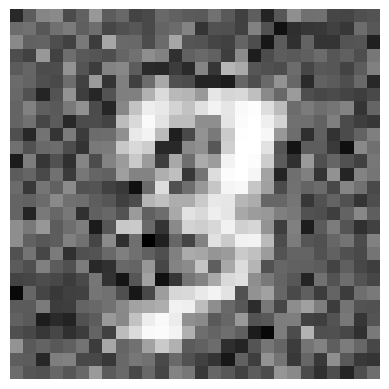

None


In [7]:
# 20 epochs
def generate(mean, std):
    z_sample = torch.normal(mean=mean, std=std, size=(64,))
    x_decoded = gan_model.generate(z_sample)
    digit = x_decoded.detach().cpu().reshape(28, 28) # reshape vector to 2d array
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

for i in range(3):
    print(generate(0,1))

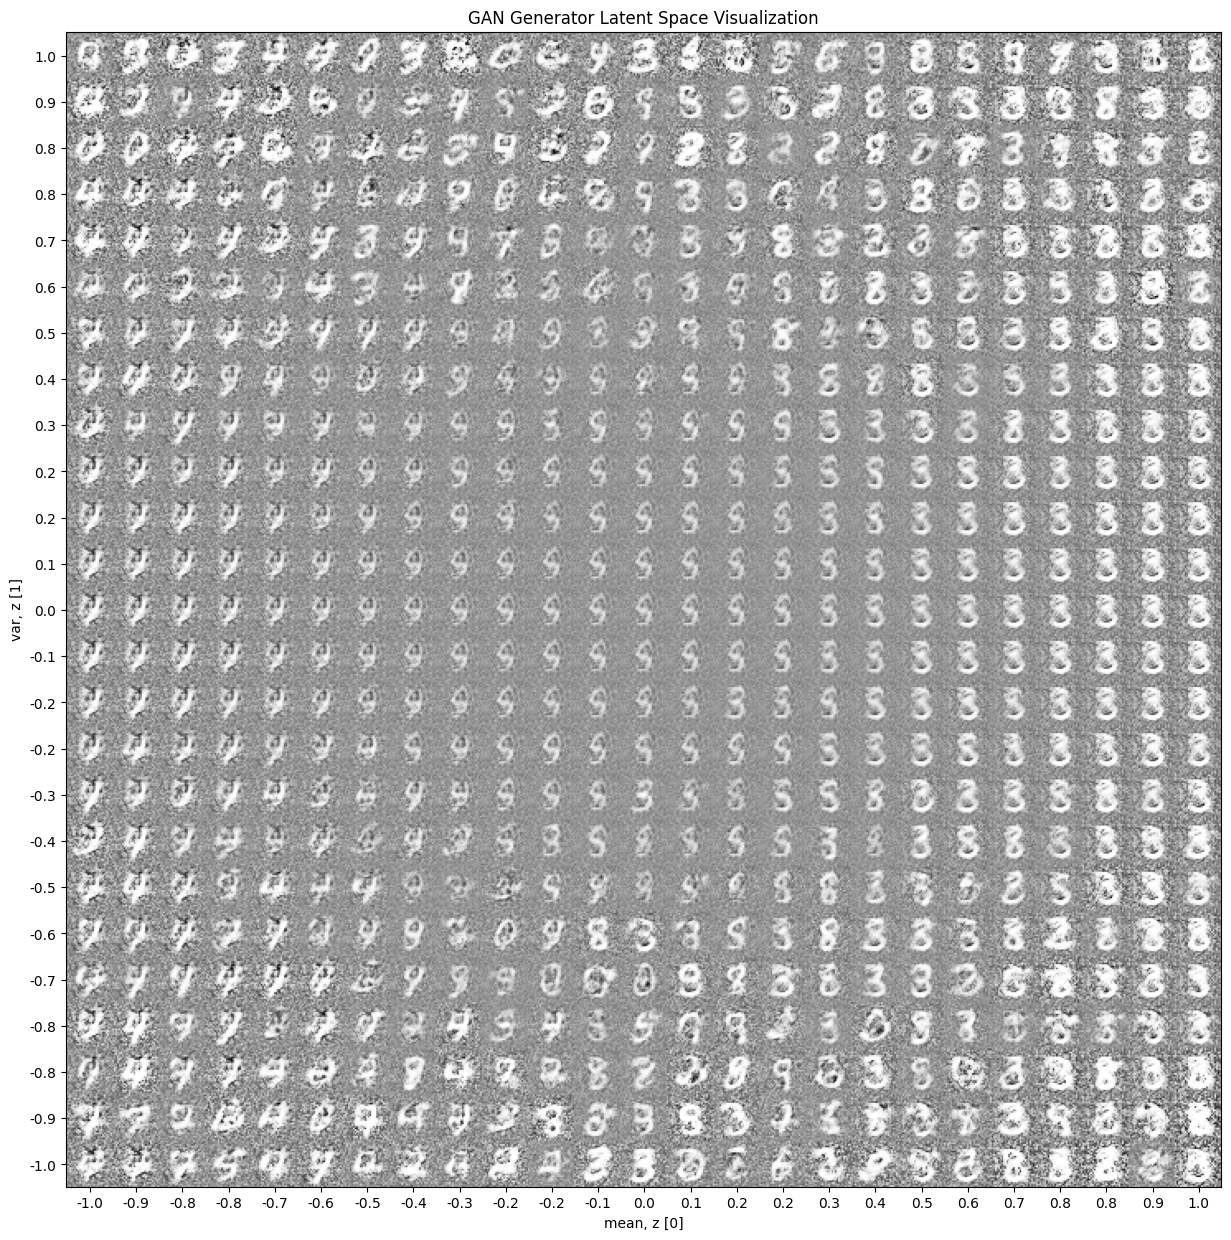

In [8]:
# 20 epochs
def plot_latent_space(model, scale=1.0, n=25, digit_size=28, figsize=15):
    # display a n*n 2D manifold of digits
    figure = np.zeros((digit_size * n, digit_size * n))

    # construct a grid 
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = torch.normal(mean=xi, std=abs(yi), size=(1, 64))
            x_decoded = model.generate(z_sample)
            digit = x_decoded[0].detach().cpu().reshape(digit_size, digit_size)
            figure[i * digit_size : (i + 1) * digit_size, j * digit_size : (j + 1) * digit_size,] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.title('GAN Generator Latent Space Visualization')
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("mean, z [0]")
    plt.ylabel("var, z [1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(gan_model)

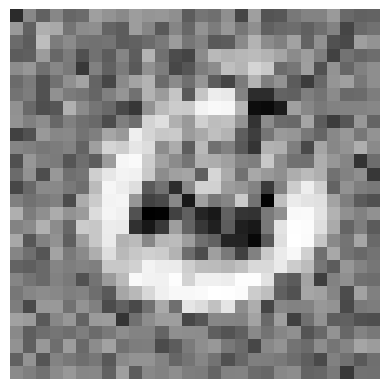

None


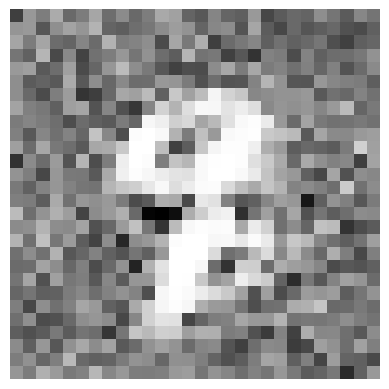

None


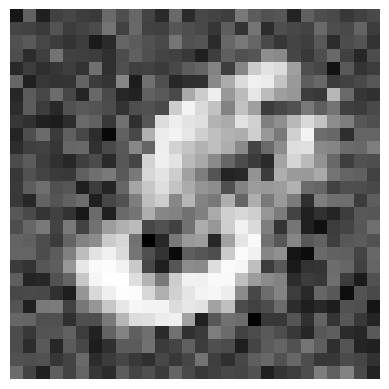

None


In [9]:
# 100 epochs
def generate(mean, std):
    z_sample = torch.normal(mean=mean, std=std, size=(64,))
    x_decoded = gan_model.generate(z_sample)
    digit = x_decoded.detach().cpu().reshape(28, 28) # reshape vector to 2d array
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

for i in range(3):
    print(generate(0,1))

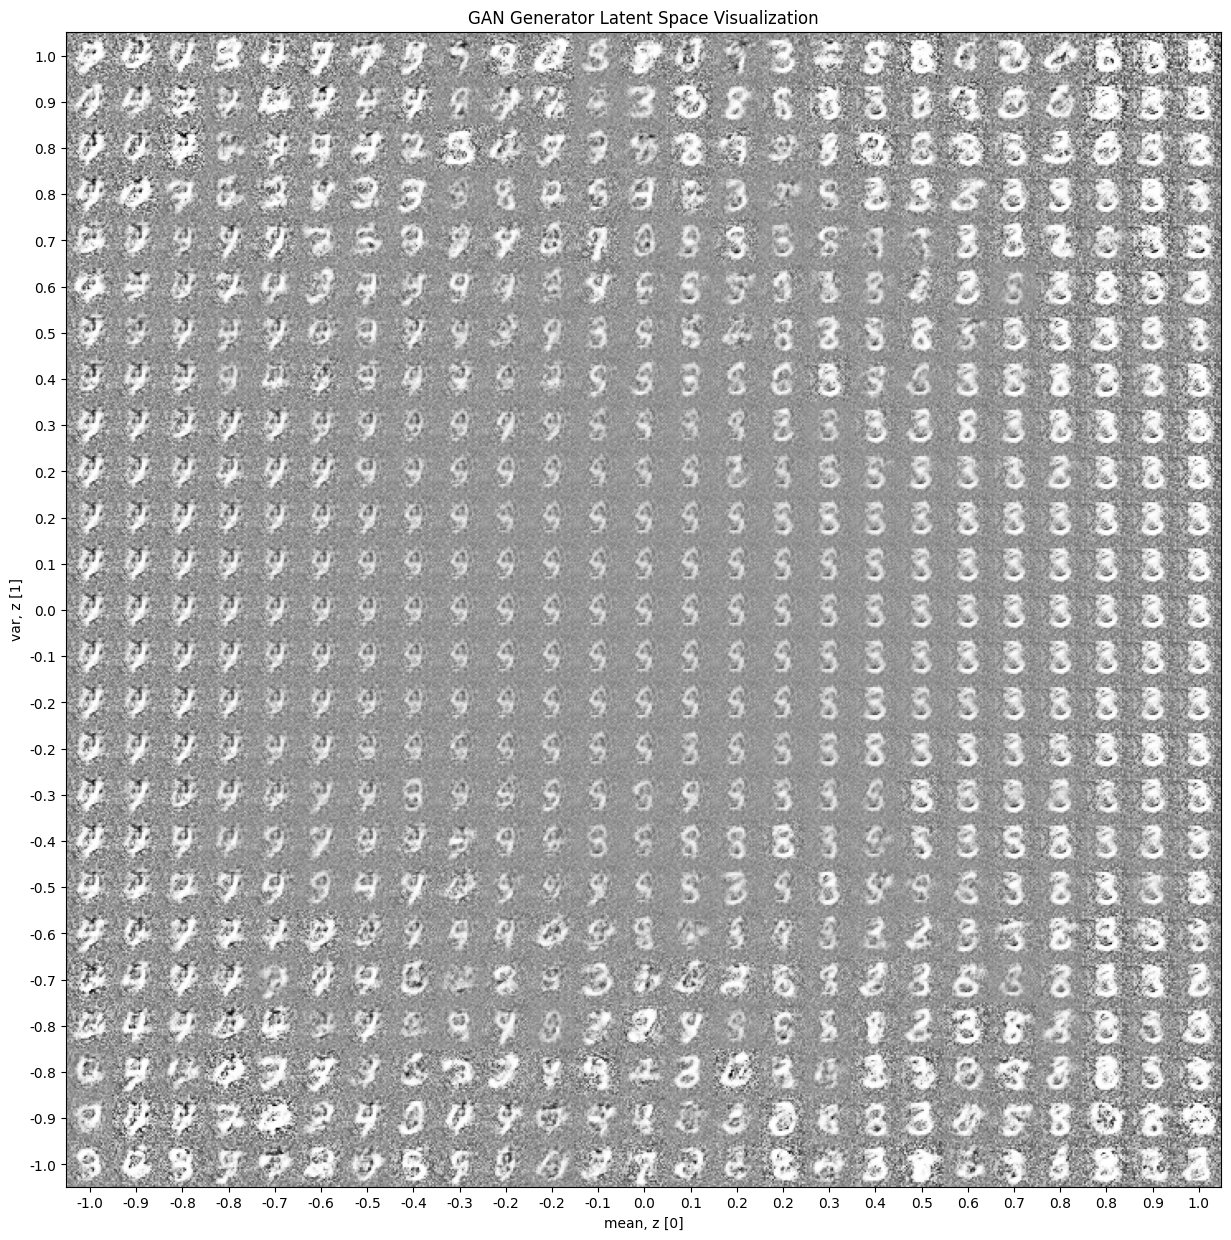

In [10]:
# 100 epochs
def plot_latent_space(model, scale=1.0, n=25, digit_size=28, figsize=15):
    # display a n*n 2D manifold of digits
    figure = np.zeros((digit_size * n, digit_size * n))

    # construct a grid 
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = torch.normal(mean=xi, std=abs(yi), size=(1, 64))
            x_decoded = model.generate(z_sample)
            digit = x_decoded[0].detach().cpu().reshape(digit_size, digit_size)
            figure[i * digit_size : (i + 1) * digit_size, j * digit_size : (j + 1) * digit_size,] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.title('GAN Generator Latent Space Visualization')
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("mean, z [0]")
    plt.ylabel("var, z [1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(gan_model)